In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_r", 100)
pd.get_option("display.max_rows")
pd.options.display.max_columns = None
from textblob import TextBlob
import nltk

In [2]:
syr_data = pd.read_csv('../data/syr_data_new.csv')

In [3]:
syr_data.head()

,year,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,admin1,admin2,admin3,location,notes,fatalities,men,women,nouns,verbs,event_id,children,civilians
0,2020,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Syria),3,NaN,0,30,Ar-Raqqa,Ar-Raqqa,Ar-Raqqa,Ar-Raqqa,"On 14 March 2020, an IED planted by an unknown...",0,0,0,"['march', 'ied', 'tawsi', 'ar-raqqa']","['planted', 'exploded', 'were', 'reported']",0,0,0
1,2020,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Syria),3,NaN,0,30,Ar-Raqqa,Ar-Raqqa,Karama,Karama,"On 14 March 2020, an IED planted by an unknown...",0,0,0,"['march', 'ied', 'qatirji', 'oil trucks', 'min...","['planted', 'exploded', 'were', 'reported']",0,0,0
2,2020,Battles,Armed clash,Unidentified Armed Group (Syria),3,QSD: Syrian Democratic Forces - Intelligence,2,23,Deir-ez-Zor,Deir-ez-Zor,Basira,Takihi,"On 14 March 2020, an unknown gunman set fire t...",0,0,0,"['march', 'unknown gunman', 'military vehicle'...","['set', 'affiliated', 'were', 'reported']",1,0,0
3,2020,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Syria),3,Operation Peace Spring,2,23,Aleppo,Al Bab,Ar-Ra'ee,Ar-Ra'ee,"On 14 March 2020, an IED planted in a car by a...",1,0,0,"['march', 'ied', ""ar-ra'ee"", 'aleppo']","['planted', 'exploded', 'killing', 'backed', '...",0,0,1
4,2020,Riots,Violent demonstration,Rioters (Syria),5,NaN,0,50,Idleb,Ariha,Ariha,Ariha,"On 14 March 2020, people of Idlib have been st...",0,0,0,"['march', 'idlib', 'jisr ariha', 'aleppo-latak...","['have', 'been', 'holding', 'overlooking', 'cu...",2,0,0


#### Codebook:

event_id:<br>
Explosions/Remote violence    0<br>
Battles                       1<br>
Riots                         2<br>
Strategic developments        3<br>
Violence against civilians    4<br>
Protests                      5<br>

From ACLED Codebook:<br>
Inter Code 1: State Forces<br>
Inter Code 2: Rebel Groups<br>
Inter Code 3: Political Militias<br>
Inter Code 4: Identity Militias<br>
Inter Code 5: Rioters<br>
Inter Code 6: Protesters<br>
Inter Code 7: Civilians<br>
Inter Code 8: External/Other Forces<br>

INTERACTION CODES:<br>
ACLED Codebook Pp. 24 - 27


#### Analysis:

There are interesting word combinations that could be used for analysis. Doing a quick and dirty search on the dataframes' txt file, 'men killed' returns 'gunmen killed X.' 

I spotted maybe two mentions of IS women killing, but most others mention women in a victim context, and often the word 'children' appears alongside it. As the 'womenandchildren' discussion was the thing that set off my thesis topic, it makes sense that this pattern can be found in the dataframe here. 

To analyse this, I'm creating two new columns: one for children, and another for civilians.

In [4]:
# Moved this code to data cleaning
#syr_data['children'] = np.where(syr_data['notes'].str.contains('\\b(?:child|children)\\b'), 1, 0)
#syr_data.head()

In [5]:
print(syr_data.children.unique())
syr_data['children'].value_counts()

[0 1]


0    72002
1     2881
Name: children, dtype: int64

In [6]:
women_children = syr_data[(syr_data['children']==1) & (syr_data['women']==1)]
print(women_children.shape)
#women_children.head()

(1062, 21)


In [7]:
# Moved this code to data cleaning
syr_data['civilians'] = np.where(syr_data['notes'].str.contains('\\b(?:civilian|civilians)\\b'), 1, 0)
#syr_data.head()

In [8]:
print(syr_data.civilians.unique())
syr_data['civilians'].value_counts()

[0 1]


0    62431
1    12452
Name: civilians, dtype: int64

In [9]:
men_women = syr_data[(syr_data['men']==1) & (syr_data['women']==1)]
print(men_women.shape)
#men_women.head()

(227, 21)


In [10]:
men = syr_data[(syr_data['men']==1)]
print(men.shape)
#men.head()

(3760, 21)


In [11]:
women = syr_data[(syr_data['women']==1)]
print(women.shape)
#women.head()

(2154, 21)


In [12]:
men_children = syr_data[(syr_data['children']==1) & (syr_data['men']==1)]
print(men_children.shape)

(341, 21)


In [13]:
women_children_men = syr_data[(syr_data['children']==1) & (syr_data['women']==1) & (syr_data['men']==1)]
print(women_children_men.shape)

(101, 21)


In [14]:
women_children_civilians = syr_data[(syr_data['children']==1) & (syr_data['women']==1) & (syr_data['civilians']==1)]
print(women_children_civilians.shape)

(586, 21)


In [66]:
men_civilians = syr_data[(syr_data['men']==1) & (syr_data['civilians']==1)]
print(men_civilians.shape)

(860, 21)


In [67]:
women_civilians = syr_data[(syr_data['women']==1) & (syr_data['civilians']==1)]
print(women_civilians.shape)

(1005, 21)


In [68]:
children_civilians = syr_data[(syr_data['children']==1) & (syr_data['civilians']==1)]
print(children_civilians.shape)

(1222, 21)


In [71]:
data = {'Women':  [2154],
        'Men': [3760],
         'Children': [2881],
        'Civilians':[12452],
        'Women and Children': [1062],
        'Men and Women':[227],
        'Men and Children':[341],
        'Women, children and men': [101],
        'Women, children and civilians':[586],
        'Men and civilians':[860],
        'Women and civilians': [1005],
        'Children and civilians': [1222]
        }


paired_mentions = pd.DataFrame (data, columns = ['Women','Men','Children','Civilians','Women and Children','Men and Women','Men and Children','Women, children and men',
        'Women, children and civilians',
        'Men and civilians',
        'Women and civilians',
        'Children and civilians'])



,Women,Men,Children,Civilians,Women and Children,Men and Women,Men and Children,"Women, children and men","Women, children and civilians",Men and civilians,Women and civilians,Children and civilians
0,2154,3760,2881,12452,1062,227,341,101,586,860,1005,1222


In [15]:
filtered_df = syr_data[(syr_data['men']==1) | (syr_data['women']==1)]
print(filtered_df.shape)
filtered_df.head()

(5687, 21)


,year,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,admin1,admin2,admin3,location,notes,fatalities,men,women,nouns,verbs,event_id,children,civilians
10,2020,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Syria),3,Civilians (Syria),7,37,Deir-ez-Zor,Al Mayadin,Thiban,Darnaj,"On 14 March 2020, an IED exploded while a colu...",1,0,1,"['march', 'ied', 'qsd', 'darnaj', 'deir-ez-zor']","['exploded', 'was', 'passing', 'killing', 'pas...",0,0,0
11,2020,Battles,Armed clash,Islamic State (Syria),2,QSD: Syrian Democratic Forces,2,22,Al-Hasakeh,Al-Hasakeh,Hole,Hole Camp,"On 14 March 2020, women of IS families killed ...",1,0,1,"['march', 'is', 'iraqi', 'qsd', 'hole', 'al-ha...","['killed', 'took']",1,0,0
45,2020,Violence against civilians,Attack,Military Forces of Turkey (2016-) Gendarmerie,8,Civilians (Syria),7,78,Idleb,Harim,Dana,Bab El Hawa,"On 12 March 2020, a young man was shot by Turk...",1,1,0,"['march', 'young man', 'gendarmerie', 'turkish...","['was', 'shot', 'was', 'attempting', 'cross']",4,0,0
49,2020,Battles,Armed clash,Unidentified Armed Group (Syria),3,HTS: Hayat Tahrir al Sham,2,23,Idleb,Harim,Dana,Sarmada,"On 12 March 2020, clashes have resumed in Sarm...",0,0,1,"['march', 'sarmada', 'idleb', 'local gunmen', ...","['have', 'resumed', 'bringing', 'storm', 'were...",1,1,0
55,2020,Strategic developments,Arrests,Military Forces of Syria (2000-) Air Force Int...,1,Civilians (Syria),7,17,Rural Damascus,Duma,Duma,Duma,"As reported on 11 March 2020, in the past week...",0,1,0,"['march', 'past week', ""regime 's air force"", ...","['reported', 'raided', 'arrested', 'including'...",3,0,0


### Create separate dataframes for each event type

In [45]:
explosions_remote = syr_data[(syr_data['event_type']=='Explosions/Remote violence')]
explosions_remote.head()
pivot_explosions = explosions_remote.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_explosions

,children,civilians,men,women
event_type,,,,
Explosions/Remote violence,2493,9124,1991,1706


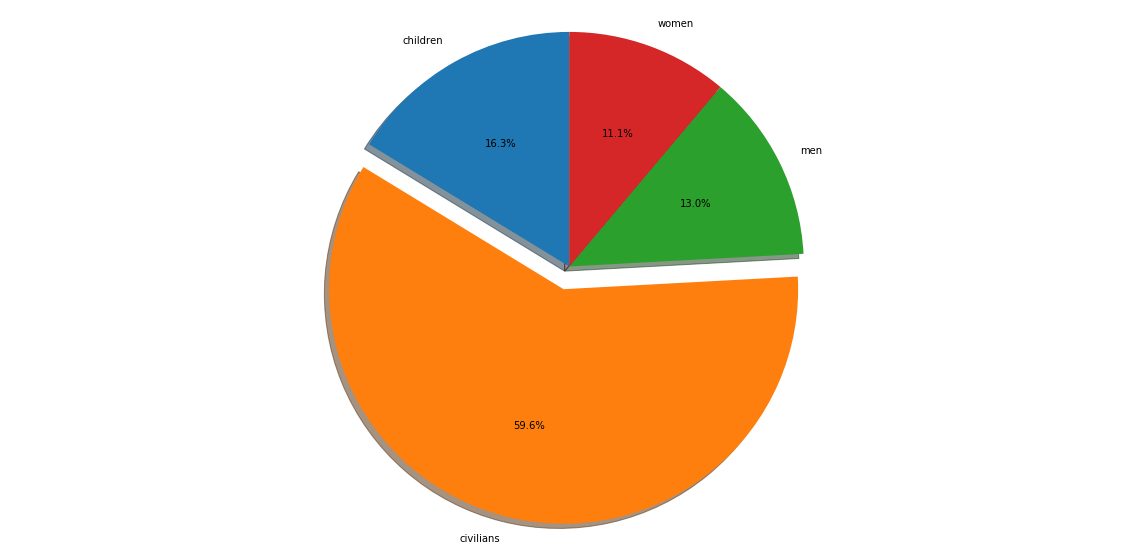

In [52]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'children', 'civilians', 'men', 'women'
sizes = [2493, 9124, 1991, 1706]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [53]:
battles = syr_data[(syr_data['event_type']=='Battles')]
#battles
pivot_battles = battles.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_battles

,children,civilians,men,women
event_type,,,,
Battles,138,859,347,129


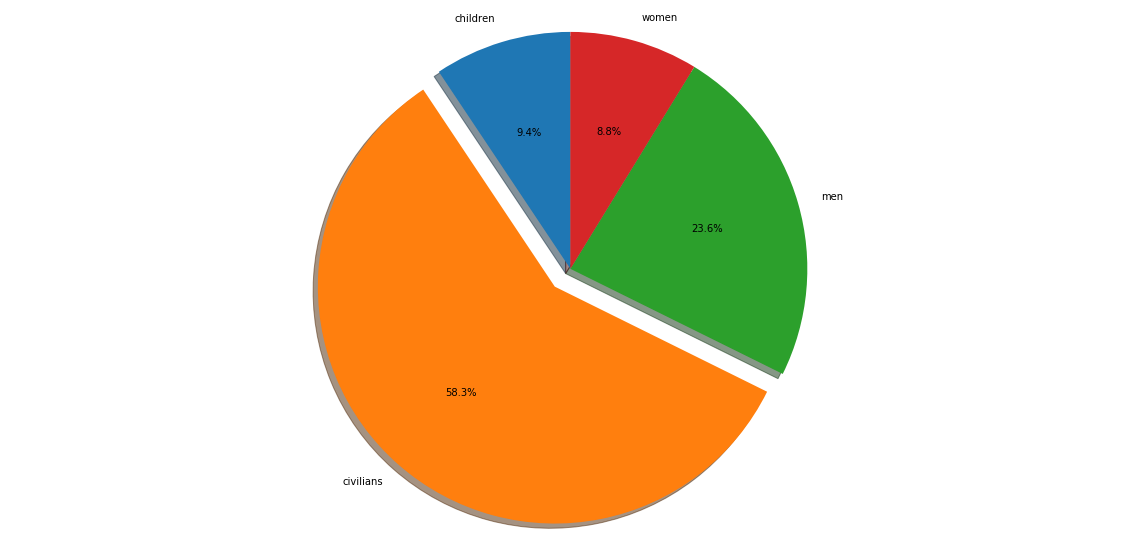

In [54]:
labels = 'children', 'civilians', 'men', 'women'
sizes = [138, 859, 347, 129]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
protests = syr_data[(syr_data['event_type']=='Protests')]
pivot_protests = protests.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_protests

,children,civilians,men,women
event_type,,,,
Protests,11,179,61,15


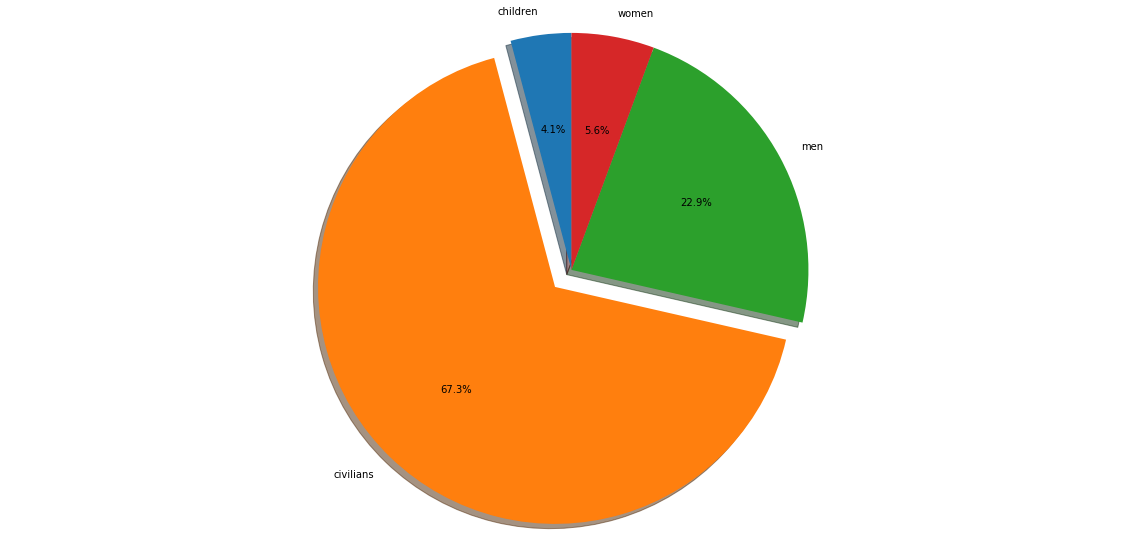

In [56]:
labels = 'children', 'civilians', 'men', 'women'
sizes = [11, 179, 61, 15]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [57]:
riots = syr_data[(syr_data['event_type']=='Riots')]
pivot_riots = riots.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_riots

,children,civilians,men,women
event_type,,,,
Riots,3,18,6,4


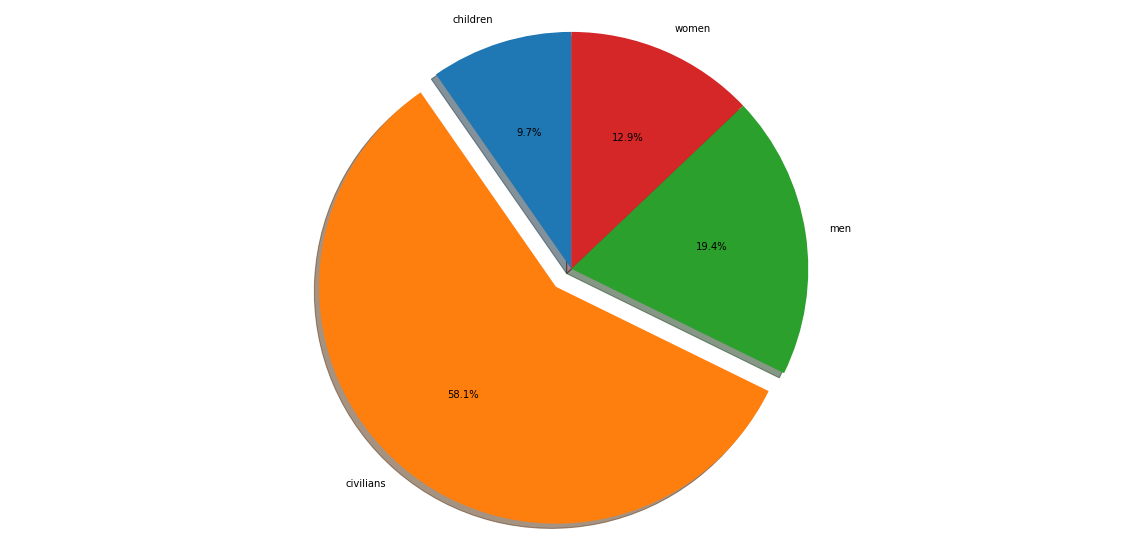

In [58]:
labels = 'children', 'civilians', 'men', 'women'
sizes = [3, 18, 6, 4]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [59]:
strategic = syr_data[(syr_data['event_type']=='Strategic developments')]
pivot_strategic = strategic.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_strategic

,children,civilians,men,women
event_type,,,,
Strategic developments,37,656,128,75


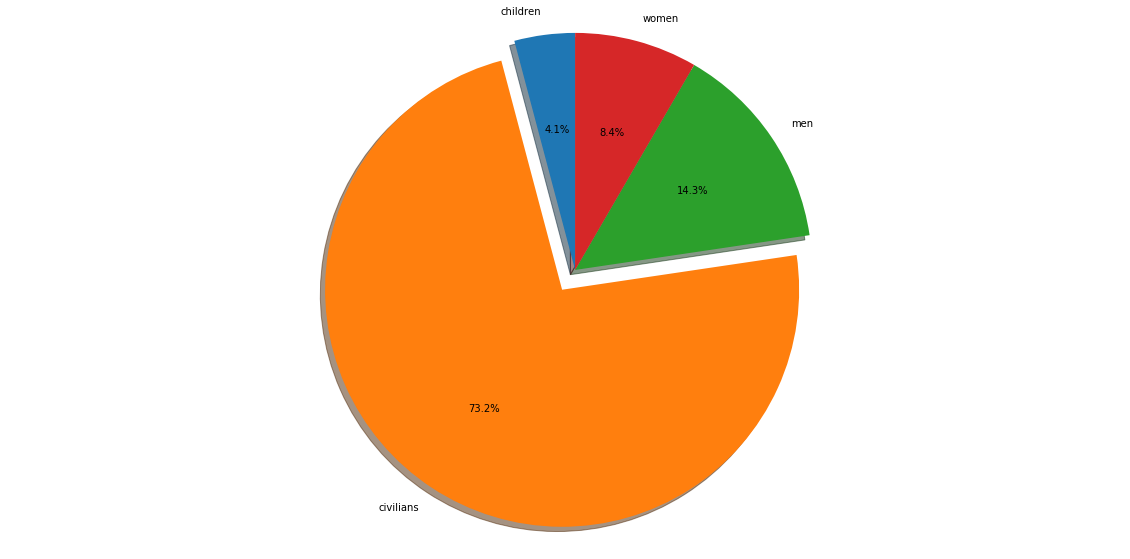

In [60]:
labels = 'children', 'civilians', 'men', 'women'
sizes = [37, 656, 128,75]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
violence_civilians = syr_data[(syr_data['event_type']=='Violence against civilians')]
pivot_violence_civilians = violence_civilians.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
pivot_violence_civilians

,children,civilians,men,women
event_type,,,,
Violence against civilians,199,1616,1227,225


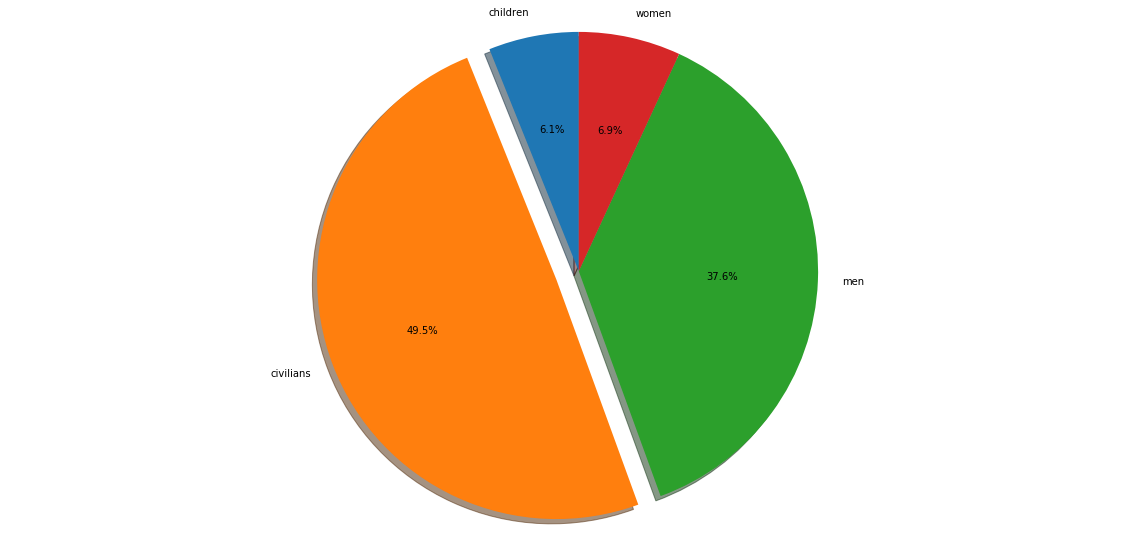

In [62]:
labels = 'children', 'civilians', 'men', 'women'
sizes = [199, 1616, 1227, 225]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Analyse type of events vs mentions men and/or women

In [22]:
syr_data.groupby(['event_type'])['fatalities'].sum()

event_type
Battles                       52433
Explosions/Remote violence    43861
Protests                         21
Riots                            13
Strategic developments          264
Violence against civilians     5990
Name: fatalities, dtype: int64

In [23]:
# Keep in mind that children, civilians, men and women count frequency of mentions, where 1 is yes, 0 is no. 
event_sub_mentions = syr_data.pivot_table(index=['event_type', 'sub_event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
event_sub_mentions

children  \
event_type                 sub_event_type                                  
Battles                    Armed clash                               132   
                           Government regains territory                3   
                           Non-state actor overtakes territory         3   
Explosions/Remote violence Air/drone strike                         1164   
                           Chemical weapon                             3   
                           Grenade                                     6   
                           Remote explosive/landmine/IED             545   
                           Shelling/artillery/missile attack         771   
                           Suicide bomb                                4   
Protests                   Excessive force against protesters          5   
                           Peaceful protest                            6   
                           Protest with intervention                   0   
Riots                      Mob violence                                1   
                           Violent demonstration                       2   
Strategic developments     Agreement                                   7   
                           Arrests                                    11   
                           Change to group/activity                    2   
                           Disrupted weapons use                       0   
                           Headquarters or base established            0   
                           Looting/property destruction                0   
                           Non-violent transfer of territory           0   
                           Other                                      17   
Violence against civilians Abduction/forced disappearance             15   
                           Attack                                    184   
                           Sexual violence                             0   

                                                                civilians  \
event_type                 sub_event_type                                   
Battles                    Armed clash                                780   
                           Government regains territory                35   
                           Non-state actor overtakes territory         44   
Explosions/Remote violence Air/drone strike                          4571   
                           Chemical weapon                             25   
                           Grenade                                     17   
                           Remote explosive/landmine/IED             1089   
                           Shelling/artillery/missile attack         3400   
                           Suicide bomb                                22   
Protests                   Excessive force against protesters          11   
                           Peaceful protest                           161   
                           Protest with intervention                    7   
Riots                      Mob violence                                 7   
                           Violent demonstration                       11   
Strategic developments     Agreement                                   49   
                           Arrests                                    127   
                           Change to group/activity                    36   
                           Disrupted weapons use                        2   
                           Headquarters or base established             4   
                           Looting/property destruction               135   
                           Non-violent transfer of territory           11   
                           Other                                      292   
Violence against civilians Abduction/forced disappearance             213   
                           Attack                                    1402   
         

In [24]:
event_mentions = syr_data.pivot_table(index=['event_type'],values=['children', 'civilians','men','women'], aggfunc=np.sum)
event_mentions

,children,civilians,men,women
event_type,,,,
Battles,138,859,347,129
Explosions/Remote violence,2493,9124,1991,1706
Protests,11,179,61,15
Riots,3,18,6,4
Strategic developments,37,656,128,75
Violence against civilians,199,1616,1227,225


In [25]:
event_mentions_gender = syr_data.pivot_table(index=['event_type'],values=['men','women'], aggfunc=np.sum)
event_mentions_gender

,men,women
event_type,,
Battles,347,129
Explosions/Remote violence,1991,1706
Protests,61,15
Riots,6,4
Strategic developments,128,75
Violence against civilians,1227,225


In [26]:
print(syr_data['event_type'].value_counts())

Explosions/Remote violence    49263
Battles                       16636
Strategic developments         3965
Violence against civilians     3833
Protests                       1131
Riots                            55
Name: event_type, dtype: int64


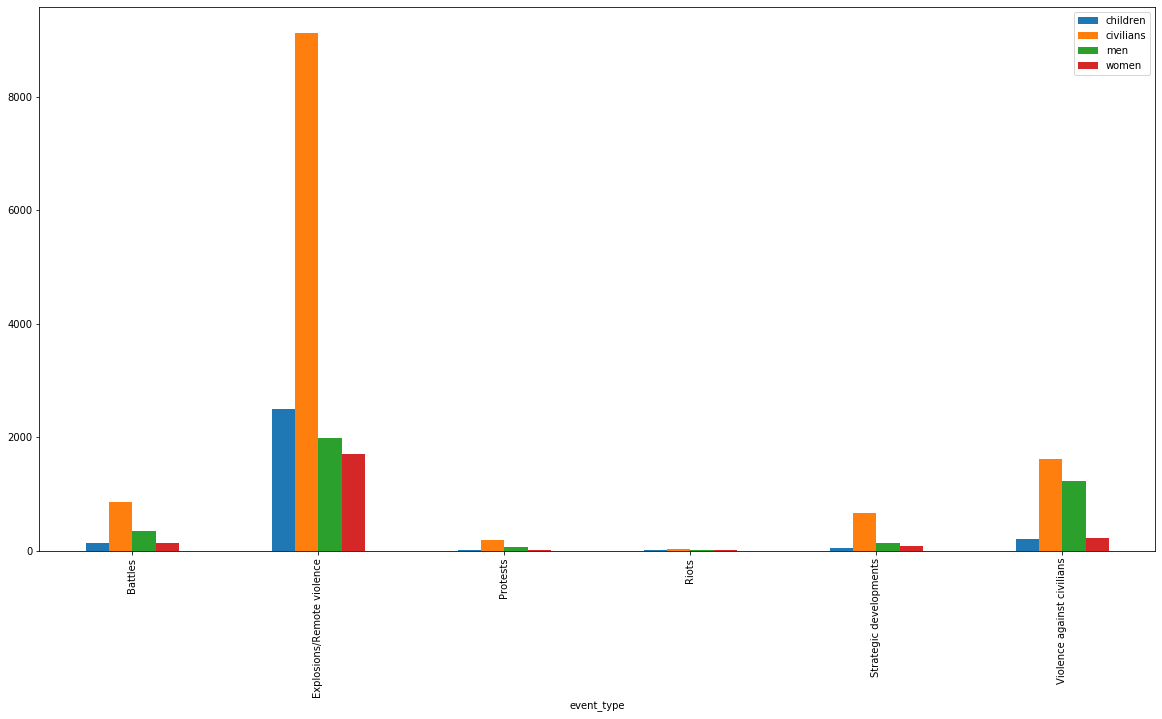

In [39]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)
event_mentions[['children','civilians','men','women']].plot(kind='bar')

plt.show()

In [29]:
sub_event_fatalities = syr_data.pivot_table(index=['event_type', 'sub_event_type' ],values=['fatalities'], aggfunc=np.sum)
sub_event_fatalities

fatalities
event_type                 sub_event_type                                 
Battles                    Armed clash                               44988
                           Government regains territory               3548
                           Non-state actor overtakes territory        3897
Explosions/Remote violence Air/drone strike                          25178
                           Chemical weapon                             322
                           Grenade                                      36
                           Remote explosive/landmine/IED              7561
                           Shelling/artillery/missile attack          9256
                           Suicide bomb                               1508
Protests                   Excessive force against protesters           21
                           Peaceful protest                              0
                           Protest with intervention                     0
Riots                      Mob violence                                  6
                           Violent demonstration                         7
Strategic developments     Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Disrupted weapons use                        65
                           Headquarters or base established              0
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
                           Other                                       199
Violence against civilians Abduction/forced disappearance                0
                           Attack                                     5990
                           Sexual violence                               0

In [30]:
event_fatalities = syr_data.pivot_table(index=['event_type'],values=['fatalities'], aggfunc=np.sum)
event_fatalities

,fatalities
event_type,
Battles,52433
Explosions/Remote violence,43861
Protests,21
Riots,13
Strategic developments,264
Violence against civilians,5990


In [31]:
event_types = pd.get_dummies(syr_data['event_type'])
event_types

,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
74878,0,1,0,0,0,0
74879,1,0,0,0,0,0
74880,0,1,0,0,0,0
74881,0,1,0,0,0,0


In [32]:
corr_data = pd.concat([syr_data[['event_type','men','women','children','civilians']], event_types], axis=1)
corr_data.corr()

,men,women,children,civilians,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
men,1.000000,0.043480,0.062424,0.038556,-0.071834,-0.062202,0.002111,0.007310,-0.019413,0.287065
women,0.043480,1.000000,0.406726,0.138794,-0.067179,0.048662,-0.011485,0.007131,-0.013933,0.041599
children,0.062424,0.406726,1.000000,0.138538,-0.083853,0.087471,-0.018509,0.002265,-0.035826,0.016235
civilians,0.038556,0.138794,0.138538,1.000000,-0.164562,0.070477,-0.002667,0.011722,-0.000532,0.159268
Battles,-0.071834,-0.067179,-0.083853,-0.164562,1.000000,-0.741069,-0.066181,-0.014489,-0.126366,-0.124130
Explosions/Remote violence,-0.062202,0.048662,0.087471,0.070477,-0.741069,1.000000,-0.171718,-0.037594,-0.327879,-0.322076
Protests,0.002111,-0.011485,-0.018509,-0.002667,-0.066181,-0.171718,1.000000,-0.003357,-0.029281,-0.028763
Riots,0.007310,0.007131,0.002265,0.011722,-0.014489,-0.037594,-0.003357,1.000000,-0.006411,-0.006297
Strategic developments,-0.019413,-0.013933,-0.035826,-0.000532,-0.126366,-0.327879,-0.029281,-0.006411,1.000000,-0.054920
Violence against civilians,0.287065,0.041599,0.016235,0.159268,-0.124130,-0.322076,-0.028763,-0.006297,-0.054920,1.000000


Found an interesting article and related code [here](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) to measure association between categorical features.

In [33]:
corr_data1 = pd.concat([syr_data[['event_type','men','women',]], event_types], axis=1)
corr_data1

,event_type,men,women,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
0,Explosions/Remote violence,0,0,0,1,0,0,0,0
1,Explosions/Remote violence,0,0,0,1,0,0,0,0
2,Battles,0,0,1,0,0,0,0,0
3,Explosions/Remote violence,0,0,0,1,0,0,0,0
4,Riots,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
74878,Explosions/Remote violence,0,0,0,1,0,0,0,0
74879,Battles,0,0,1,0,0,0,0,0
74880,Explosions/Remote violence,0,0,0,1,0,0,0,0
74881,Explosions/Remote violence,0,0,0,1,0,0,0,0


In [34]:
import math
from collections import Counter
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
from dython._private import (
    convert, remove_incomplete_samples, replace_nan_with_value
)

### Visualize 

**The issue:**<br>
There is a lack and call for gender disaggregated data in the humanitarian sector. The dataframe I'm working on, while very structured, also lacks this data, which is naturally why I'm working on it to attempt an approximation of gender disaggregation. That's the project. 

The notes column (as well as some of the actors' columns) are the only ones with mentions of men, women, children, or civilians. I'm building my analysis on the notes column; from there I've built 4 new columns (women, men, civilians, children), returning 1 if these are mentioned, or 0 if they are not. 

However, these notes do not specifically talk about victims; contexts for these could vary from injuries, deaths, active actors, perpretrators, etc. All I can do with the current analysis is look at association of the type of events, and do comparisons between mentions. 

One theory I have is that, when women and/or children are victims, they are specifically mentioned (by number if known), rather than simply referring to them as 'civilians.'. There are cases where all three are mentioned, usually in the context of "X civilians were killed/injured, including Y women and Z children." Men are rarely specifically mentioned. 

Another interesting aspect to take into account for future analysis is the use of gender-specific words (men, women, etc) vs. sex (female, male). From a quick lookover, 'female' is chosen more often than 'woman' when talking about 'female' IS members or 'female' members of a group (actors as defined by ACLED). However, this was not unanymous, so including female/male in the analysis was necessary; rather be completely thorough than pre-select, since I can't select women and men based on victimhood, either. 

#### Test the theory:

In [35]:
syr_data.pivot_table(index=['civilians'],values=['children','men','women'], aggfunc=np.sum)

,children,men,women
civilians,,,
0,1659,2900,1149
1,1222,860,1005


### Stats analysis:

[Correlation categorical variables](https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income)

### Analyzing actors

In [36]:
actors1 = pd.get_dummies(syr_data['actor1'])
actors1.head()

,13th Division,18 March Division,1st Brigade of Damascus,1st Coastal Division,23rd Division,2nd Coastal Division,3rd Corps,4th Legion,5th Corps,9th Division Special Forces,AAR: Ahfad al Rasul Brigades,AAS: Ahrar al Sham,ASS: Sword of al Sham Brigades,Abu Amara Brigade,Abu Amara Brigade: Special Task Brigade,Abu Hamza al Nuami Brigade,Abu al Walid Battalion,Ahl al Diyar Operations Room,Ahmad al Abdo Forces,Ahrar Jabal al Sheikh,Ahrar Nawa Brigade,Ahrar al Sharqiyah,Ajnad al Sham Islamic Union,Al Bab Communal Militia (Syria),Al Bustan Association,Al Fath Al Mubeen Operation Room,Al Malahim Division,Al Mu'tasim Brigade,Al Sham Corps,Al Wosta Division,Al-Fath Al-Mubeen Operation Room,Al-Hasakeh Tribal Militia (Syria),Al-Karama Camp Communal Militia (Syria),Al-Malikeyyeh Communal Militia (Syria),Allied Syrian and/or Russian Forces,Alwiya al Furqan,Ansar Al Hajjah Brigade,Ansar al Din Front (Syria),Ansar al Tawhid,Arab Clan Militia (Syria),Army of Mujahideen,As Salamiyeh Communal Militia (Syria),As-Sweida Communal Militia (Syria),Asayish (Syria),Ash-Shajara Communal Militia (Syria),Azaz Communal Militia (Syria),Bakkara Youth Gathering (Syria) (Syria),Banyan al Marsus,Barq al Shahil,Buferio Tribal Militia (Syria),Civilians (Iraq),Civilians (Syria),DFNS: Democratic Federation of Northern Syria,Dar'a Popular Resistance,Daraya Unit,Diwan al Hisbah,Druze Militia (Syria),Eagles of the Whirlwind,Eastern Shield Army,Eblin Communal Militia (Syria),FSA Fighters Brigade,FUS: Lions of Sunnah Division,FaR: Al Rahman Corps,Fatemiyoun Brigade,Fawj Maghawir al Badiya,Faylaq al Majd,Former Operation Euphrates Shield,Former Operation Olive Branch,Former Opposition Rebels (Syria),Free Alawite Movement,Free Idlib Army,Free Syrian Police,Future Syria Party,Ghuraba al Janob,Global Coalition Against Daesh,Golan Regiment,Government of Iran (1989-),Government of Syria (2000- ),Government of Syria (2000-),Government of Turkey (2016-),HNDZ: Nour al Din al Zinki Movement,HTS: Hayat Tahrir al Sham,HTW: National Liberation Movement,HXP: Self-Defense Forces,Hamza Bin Abdul Muttalib,Hamza Brigade,Hamza Division - Aleppo,Harakat Hezbollah al Nujaba,Harakat al Qiyam,Hezbollah,Hizbullah Brigade (Iraq),Homs Legion,Homs Operation Room,Hurras al Deen,ISIS Hunters,Idleb State,Iraqi and/or Coalition Forces,Islamic State (Syria),Islamist Militia (International),Islamist Militia (Syria),Islamist Rebels (Syria),JAA: Army of Free Tribes,JMA: Army of Emigrants and Supporters,JMT: Army of the Commandos of the Revolution,JOS: Lions of the East Army,JSH: Free Syrian Army,JSH: Free Syrian Army Liwa Al Qadissyah,JTS: Syria Liberation Front,JTS: Syrian Revolutionaries Front,JTW: National Liberation Front,JWS: Syrian National Army,JaF: Army of Conquest,JaM: Army of Monotheists (Syria),JaN: Elite Army,JaS: Al Sanadid Forces (Syria),JaS: Levant Front,JaT: Army of Revolutionaries,JaT: Revolutionary Army,JaY: Yarmouk Army,Jabhat Fateh al Sham,Jarablus Communal Militia (Syria),Jaysh Ahrar al Ashair,Jaysh Fatah al Jadid,Jaysh Hama,Jaysh Osama,Jaysh al Ahrar,Jaysh al Inqaz,Jaysh al Islam,Jaysh al Izza,Jaysh al Janub,Jaysh al Nasr,Jaysh al Tawhid,Jaysh al Thani,Jaysh al-Ahrar,Jazaret Elbuhmeid Communal Militia (Syria),JeA: Ababil Horan Battalion,Jund al Aqsa,KSS: Northern Sun Battalion,KTM: Menbij Revolutionaries Battalion,KaB: Ba'ath Brigades,Kasham Communal Militia (Syria),Kataeb Abu Amara,Kataib Nusra Dar'a,Kataib al Majd,Katibat Jabal al Islam,Khalid ibn al Walid Army,Kurdish Ethnic Militia (Syria),Kurdish Falcons Brigade,LAS: Northern Storm Brigade,LaQ: Quds Brigade,Liberation Army of Afrin,Liwa Fajr al Umma,Liwa Samarkand,Liwa Sham al Rasul,Liwa al Aqsa,Liwa al Baqir,Liwa al Haqq (Dar'a),Liwa al Hurriyah al Islami,Liwa al Mukhtar Al Thaqafi,Liwa al Safira,MDA: Deir-ez-Zor Military Council,MFS: Syriac Military Council,MLKP: Marxist-Leninist Communist Party,Maaret Harma Military Council,Malhama Tactical,Mashaal Tammo,Menbij Internal Security Forces,Menbij Military Council,Military Counci

In [37]:
actors2 = pd.get_dummies(syr_data['actor2'])
actors2.head()

,102nd Brigade,18 March Division,1st Coastal Division,1st Infantry Division,1st Regiment,2nd Coastal Division,3rd Corps,4th Legion,5th Corps,9th Division Special Forces,AAK: Ajnad al Kavkaz,AAS: Ahrar al Sham,Abna al Sham (Idleb),Abna'a al Qadasya,Abu Amara Brigade,Abu Amara Brigade: Special Task Brigade,Abu Bakr as-Siddiq Army,Ahmad al Abdo Forces,Ahrar Jabal al Sheikh,Ahrar al Sharqiyah,Ajnad al Hasakah,Ajnad al Sham,Ajnad al Sham Islamic Union,Aknaf Bait al Maqdis,Al Ahrar Assembly,Al Bab Communal Militia (Syria),Al Fath Al Mubeen Operation Room,Al Haramain Brigade,Al Maghawir Division,Al Malahim Division,Al Mu'tasim Brigade,Al Qaeda,Al Sham Corps,Al Wosta Division,Al-Afadilah Tribal Militia (Syria),Al-Bujamil Tribal Militia (Syria),Al-Dur Communal Militia (Syria),Al-Fath Al-Mubeen Operation Room,Al-Izba Communal Militia (Syria),Al-Kubar Communal Militia (Syria),Al-Sham Corps,Allied Syrian and/or Russian Forces,Alwiya al Furqan,Ansar al Din Front (Syria),Ansar al Sham Battalion,Ansar al Tawhid,Ariqa Communal Militia (Syria),Army of Mujahideen,As Sweida Communal Militia (Syria),As-Sanamayn Communal Militia (Syria),As-Sweida Communal Militia (Syria),Asayish (Syria),Ash-Shajara Communal Militia (Syria),Ashbal al Ma'ara,Azaz Communal Militia (Syria),BSF: Syrian Border Security Force,Bakkara Youth Gathering (Syria),Banyan al Marsus,Brigade 135,Civilians (Indonesia),Civilians (International),Civilians (Iraq),Civilians (Jordan),Civilians (Palestine),Civilians (Russia),Civilians (Syria),Civilians (United States),Communal Militia (Syria),Dar'a Popular Resistance,Daraya Unit,Deir-ez-Zor Revolutionaries Gathering,Der'e al Hasakeh,Diwan al Hisbah,Druze Ethnic Militia (Syria),Druze Militia (Syria),Duat al Jihad Center,Eastern Shield Army,Eblin Communal Militia (Syria),FUS: Lions of Sunnah Division,FaR: Al Rahman Corps,Farouq Battalions,Farqat Abna' al Qadisiya,Fatemiyoun Brigade,Fawj Maghawir al Badiya,Faylaq al Majd,Ferwan Communal Militia (Syria),Former Ahrar al Sham,Former Islamic State (Syria),Former Mutaaz Billah Army,Former Operation Euphrates Shield,Former Operation Olive Branch,Former Opposition Rebels (Syria),Free Idlib Army,Free Syrian Police,Global Coalition Against Daesh,Golan Regiment,Government of Iran (1989-),Government of Israel (2009-),Government of Jordan (1999-),Government of Russia (2000-),Government of Syria (2000- ),Government of United States,HNDZ: Nour al Din al Zinki Movement,HPC: Essential Protection Forces,HTS: Hayat Tahrir al Sham,HXP: Self-Defense Forces,Hadidiyin Tribal Militia (Syria),Hamza Bin Abdul Muttalib,Hamza Brigade,Hamza Division - Aleppo,Hezbollah,Hssein Communal Militia (Syria),Humat Al-Aqeeda (Syria),Hurras al Deen,Idlib Martyrs' Brigade,Imam Bukhari Battalion,Islamic Freedom Brigade,Islamic State (Syria),Islamist Militia (Syria),Islamist Rebels (Syria),Iz al Islam Battalion,JAA: Army of Free Tribes,JFS: Al Nusra Front,JFS: Al Nusra Front (Muhammad Brigade),JMA: Army of Emigrants and Supporters,JMT: Army of the Commandos of the Revolution,JOS: Lions of the East Army,JSH: Free Syrian Army,JTR: Front of Raqqa Revolutionaries,JTS: Syria Liberation Front,JTS: Syrian Revolutionaries Front,JTW: National Liberation Front,JWS: Syrian National Army,JWS: Syrian National Army- 1st Brigade,JaF: Army of Conquest,JaN: Elite Army,JaS: Al Sanadid Forces (Syria),JaS: Levant Front,JaT: Army of Revolutionaries,JaT: Revolutionary Army,JaY: Yarmouk Army,Jabhat Ansar al Islam,Jabhat Fateh al Sham,Jaysh Al Ahfad,Jaysh al Ahrar,Jaysh al Islam,Jaysh al Izza,Jaysh al Nasr,Jaysh al Nukhba,Jaysh al Tawhid,Jazaa Communal Militia (Syria),JeA: Ababil Horan Battalion,Jund Badr 313,Jund al Aqsa,KNC: Kurdish National Council,Kafr Takharim Communal Militia (Syria),Karak Communal Militia (Syria),Kataib Hezbollah (Iraq),Katibat Ahrar al Janub,Katibat Jabal al Islam,Khalid ibn al Walid Army,Khalid ibn al Walid Brigade,Khan Shaykun Communal Militia (Syria),Knights of the Golan,Kurdish Ethnic Militia (Syria),Kurdish Falcons Brigade,LA